In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\gene_expression_kNN.csv")
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [3]:
df.shape

(3000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df['Gene One'].unique()

array([ 4.3,  2.5,  5.7,  6.1,  7.4,  3.4,  3.1,  6.3,  5.5,  7.7,  6.6,
        5.4,  5.2,  8.3,  4.2,  3. ,  4.9,  8.5,  7.2,  3.3,  9.3,  7.8,
        2.4,  6.4,  3.6,  4.6,  9.7,  5. ,  6.8,  5.9,  6.2,  6.7,  4.8,
        3.5,  6.9,  6.5,  2.7,  3.9,  8.4,  3.7,  4.1,  7.1,  2.6,  1.8,
        4.7,  8.9,  8.6,  7.6,  9.1,  4.5,  4. ,  7.3,  2.8,  2.9,  5.6,
        4.4,  7.5,  8.2,  9. ,  5.8,  3.2,  9.4,  2.2,  6. ,  5.3,  5.1,
        7. ,  8.8,  8.7,  2.3,  3.8,  7.9,  8.1,  9.2,  2. ,  9.5,  1.9,
        1.6,  8. ,  1.5,  2.1,  1.2,  1. ,  9.6,  1.7,  9.9, 10. ,  9.8,
        1.3])

In [6]:
df['Gene Two'].unique()

array([ 3.9,  6.3,  6.2,  3.4,  7.5,  6.8,  4.9,  8.6,  3.5,  2.9,  4.5,
        7.2,  5.7,  5.4,  9.3,  7.7,  5.6,  4.2,  3.7,  5.3,  6.4,  5. ,
        6.9,  6.5,  4.8,  3.2,  6.1,  7.3,  5.1,  2.3,  4.1,  4.6,  7.8,
        2.5,  6. ,  6.6,  8.4,  8.8,  7.1,  4.7,  4. ,  3.8,  5.5,  2.4,
        4.3,  7. ,  3.6,  7.4,  2.1,  8.2,  3.3,  6.7,  7.6,  3.1,  9.1,
        8.5,  1.8,  5.9,  2.6,  4.4,  5.2,  2.8,  5.8,  3. ,  8.3,  7.9,
        2.7,  8.1,  9.4,  8. ,  2.2,  1.9,  1.2,  9. ,  8.7,  1. ,  1.4,
        1.6,  1.5,  9.2,  2. ,  1.7,  8.9,  9.8,  9.6,  9.5,  9.7, 10. ])

In [7]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [8]:
df.skew()

Gene One          0.027042
Gene Two          0.002871
Cancer Present    0.000000
dtype: float64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

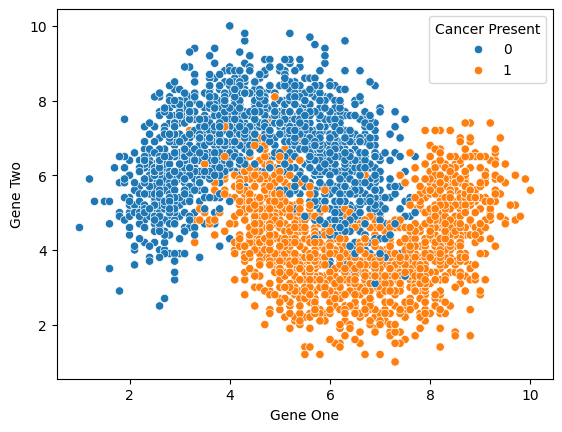

In [9]:
sns.scatterplot(data = df,x = df['Gene One'],y = df['Gene Two'],hue = 'Cancer Present')

In [10]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [11]:
X = df.drop(columns = 'Cancer Present')
y = df['Cancer Present']

### Train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y , random_state = 9 , test_size = 0.2)

### scalling 

* scalling is compalsurry or mendetry in the knn algorithm

In [13]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### hyper parameter tuning for knn classifier

In [18]:
estimator = KNeighborsClassifier()

param_grid = {'n_neighbors':list(range(10,25))}

grid = GridSearchCV(estimator,param_grid,cv = 5, scoring = 'accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 19}

# Modelling

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train,y_train)

# train accuracy 
y_pred_train = knn.predict(X_train)
from sklearn.metrics import accuracy_score
print('train aaccuracy',accuracy_score(y_train,y_pred_train))

# cross validatoin score 
from sklearn.model_selection import cross_val_score
print('cross validation score is :',cross_val_score(knn,X_train,y_train,cv = 5).mean())

# test accuracy 
y_pred_test = knn.predict(X_test)
print('test accuracy is :', accuracy_score(y_test,y_pred_test))

train aaccuracy 0.9408333333333333
cross validation score is : 0.9400000000000001
test accuracy is : 0.9333333333333333


### confusion Matrics

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,y_pred_test)

array([[264,  19],
       [ 21, 296]])

In [21]:
from sklearn.metrics import classification_report
classification_report (y_test,y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93       283\n           1       0.94      0.93      0.94       317\n\n    accuracy                           0.93       600\n   macro avg       0.93      0.93      0.93       600\nweighted avg       0.93      0.93      0.93       600\n'